<a href="https://colab.research.google.com/github/thiagohrcosta/ML-Number/blob/main/ml_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install utils
import numpy
from matplotlib import pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, InputLayer
from keras.layers import Dropout
from keras.utils import to_categorical


  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=1a0790177c45a1f143dda2862beb30ba769f3893820643a2caa8060da4ea6a36
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
# loading the Mnist dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Print the vector size
print(X_train.shape)

(60000, 28, 28)


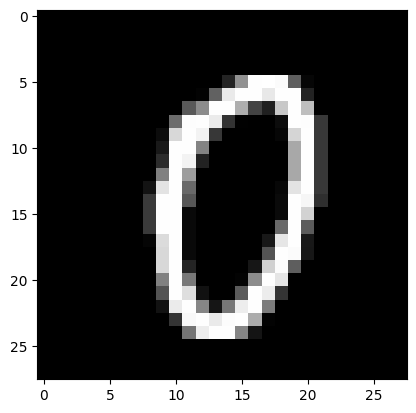

In [ ]:
first_image = X_train[1000]
first_image = numpy.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
# Answer
print(y_train[1000])

0


In [ ]:
# pixel total sum
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

784


In [ ]:
# Transform pixels
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [ ]:
print(first_image)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   36. 146. 254. 255. 251.  95.   6.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  97.
  234. 254. 254. 232. 254. 254.  35.   0.   0.   0.   0.  

In [ ]:
# Transform values to 0 and 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

In [ ]:
print(X_train2[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
# Transforming values from train
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)
print(y_train[1001])
print(y_train_h[1001])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
num_classes = y_test_h.shape[1]

In [ ]:
# feed-forward
model = Sequential()

# Create the input layer
model.add(InputLayer(input_shape=num_pixels))

# Create the first network layer
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))

# Second network layer
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))

# Exit layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [ ]:
# Print informations about the created model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_2 (Dense)             (None, 10)                20490     
                                                                 
Total params: 2923530 (11.15 MB)
Trainable params: 2923530 (11.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Created model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Model Training
result = model.fit(X_train2, y_train_h, validation_data=(X_test2, y_test_h), epochs=20, verbose=1, batch_size=100)


Epoch 1/20
600/600 [==============================] - 9s 9ms/step - loss: 0.1805 - accuracy: 0.9449 - val_loss: 0.0897 - val_accuracy: 0.9717
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0676 - accuracy: 0.9786 - val_loss: 0.0810 - val_accuracy: 0.9737
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0451 - accuracy: 0.9848 - val_loss: 0.0843 - val_accuracy: 0.9739
Epoch 4/20
600/600 [==============================] - 3s 6ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0786 - val_accuracy: 0.9758
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0804 - val_accuracy: 0.9800
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0814 - val_accuracy: 0.9795
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0877 - val_accuracy: 0.9784
Epoch 

In [ ]:
x = X_train2[1001]
print(x)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [ ]:
x = numpy.expand_dims(x, axis=0)
print(x.shape)


(1, 784)


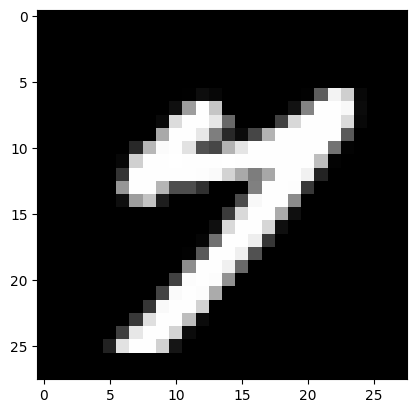

In [ ]:
image_to_get_data = X_train[1001]
image_to_get_data = numpy.array(image_to_get_data, dtype='float')
pixels = image_to_get_data.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
# Predict model
print(model.predict(x))
print(numpy.argmax(model.predict(x)))

1/1 [==============================] - 0s 25ms/step
[[7.7920176e-22 2.0848777e-14 1.4317685e-19 1.6121921e-16 2.2757698e-03
  3.0275526e-19 1.1101041e-21 9.9772424e-01 8.0614905e-18 1.2485496e-10]]
1/1 [==============================] - 0s 16ms/step
7


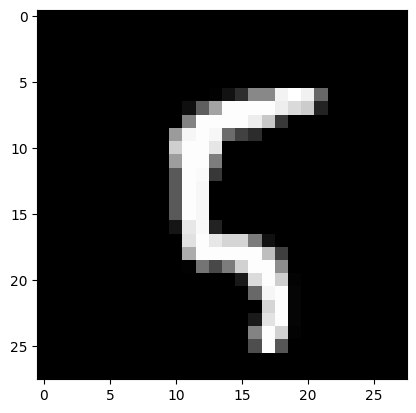

1/1 [==============================] - 0s 49ms/step
[[4.6965273e-19 3.7672646e-19 1.6519114e-17 1.1038094e-13 6.9347682e-20
  1.0000000e+00 4.8473938e-12 3.2774150e-20 1.8838252e-08 2.0743332e-10]]
1/1 [==============================] - 0s 29ms/step
5


In [ ]:
x = X_train2[100]
x = numpy.expand_dims(x, axis=0)
image_to_get_data = X_train[100]
image_to_get_data = numpy.array(image_to_get_data, dtype='float')
pixels = image_to_get_data.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(model.predict(x))
print(numpy.argmax(model.predict(x)))


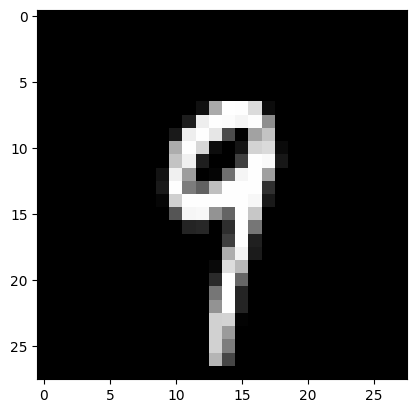

1/1 [==============================] - 0s 28ms/step
[[1.6802023e-28 5.9563986e-22 1.0795826e-26 2.3519327e-20 2.1029300e-12
  3.7882591e-20 2.4116000e-31 6.1257943e-21 5.0083501e-23 1.0000000e+00]]
1/1 [==============================] - 0s 28ms/step
9


In [ ]:
x = X_train2[600]
x = numpy.expand_dims(x, axis=0)
image_to_get_data = X_train[600]
image_to_get_data = numpy.array(image_to_get_data, dtype='float')
pixels = image_to_get_data.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(model.predict(x))
print(numpy.argmax(model.predict(x)))


In [ ]:
# MANUAL INPUT
from PIL import Image
import numpy as np


Model input shape: (None, 784)
Input data shape: (1, 784)


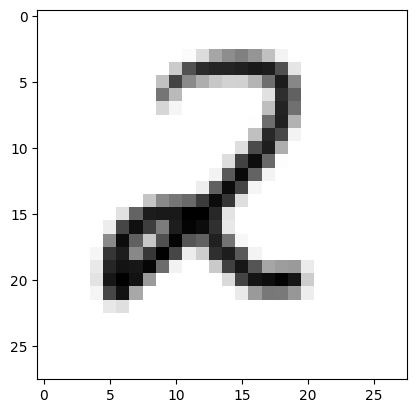

1/1 [==============================] - 0s 16ms/step
[[1.2813426e-14 2.9492098e-06 9.9912900e-01 4.7918546e-04 2.4132944e-12
  3.3564144e-04 1.5402060e-10 5.3285803e-05 5.3869736e-10 3.7778416e-16]]
2


In [ ]:
image_path = '/content/img2.png'
image_to_get_data = Image.open(image_path).convert('L')

image_to_get_data = image_to_get_data.resize((28, 28))

image_to_get_data = np.array(image_to_get_data, dtype='float32') / 255.0

x = image_to_get_data.flatten()  # Flatten the 28x28 image to a 784 vector
x = np.expand_dims(x, axis=0)  # Add batch dimension

print("Model input shape:", model.input_shape)
print("Input data shape:", x.shape)

plt.imshow(image_to_get_data, cmap='gray')
plt.show()

predictions = model.predict(x)
print(predictions)
print(np.argmax(predictions))